In [1]:
#Régression linéaire multiple , modèle polynomiâle
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [2]:
x , y = make_regression(n_samples=100, n_features=1, noise = 10)

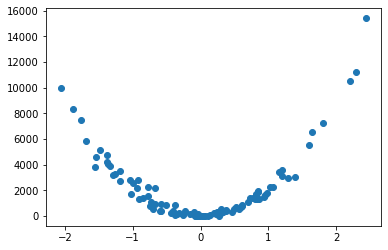

In [4]:
y = y**2
plt.scatter(x,y)

In [5]:
print(x.shape)
print(y.shape)

(100, 1)
(100,)


In [9]:
y = y.reshape(y.shape[0],1 )
print(y.shape)

(100, 1)


In [10]:
X = np.hstack((x , np.ones(x.shape)))
X = np.hstack((x**2, X))
X.shape

(100, 3)

In [11]:
X

array([[ 1.92622209e-03,  4.38887468e-02,  1.00000000e+00],
       [ 6.60138415e-01,  8.12489024e-01,  1.00000000e+00],
       [ 6.98419017e-01,  8.35714674e-01,  1.00000000e+00],
       [ 5.21410799e+00,  2.28344214e+00,  1.00000000e+00],
       [ 9.00044364e-02,  3.00007394e-01,  1.00000000e+00],
       [ 3.72567404e-02,  1.93020052e-01,  1.00000000e+00],
       [ 5.09540480e-02, -2.25730033e-01,  1.00000000e+00],
       [ 3.34234944e-01, -5.78130559e-01,  1.00000000e+00],
       [ 1.09390542e+00, -1.04589934e+00,  1.00000000e+00],
       [ 1.45085748e+00,  1.20451545e+00,  1.00000000e+00],
       [ 1.05290147e+00,  1.02610987e+00,  1.00000000e+00],
       [ 1.02155807e-01, -3.19618220e-01,  1.00000000e+00],
       [ 1.06716755e-01,  3.26675304e-01,  1.00000000e+00],
       [ 2.41017165e+00, -1.55247275e+00,  1.00000000e+00],
       [ 3.37762927e-01, -5.81173749e-01,  1.00000000e+00],
       [ 2.20367049e+00, -1.48447650e+00,  1.00000000e+00],
       [ 2.06552171e-02,  1.43719230e-01

In [12]:
#Initialiser theta avec des paramètres aléatoires
theta = np.random.randn(3,1)
theta.shape

(3, 1)

In [13]:
#Etape 2: modèle
#créer fonction X produit theta
def model(X, theta):
    return X.dot(theta)

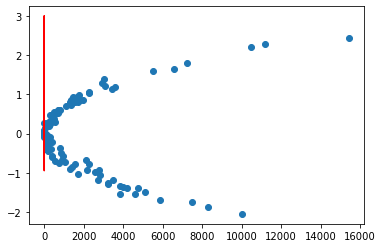

In [14]:
plt.plot(x,model(X, theta), c='r')
plt.scatter(y,x)

In [15]:
#Fonction cout (erreur quadratique moyenne) >> on veut que ça tende vers 0
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X,theta)-y)**2)

In [16]:
cost_function(X,y,theta)

5902541.376280512

In [17]:
#Gradient et Descente de gradient
#Gradient
def grad(X,y,theta):
    m=len(y)
    return (1/m)*X.T.dot( model(X,theta) - y)

In [18]:
grad(X,y,theta)

array([[-5150.3191207 ],
       [ -221.24998105],
       [-2083.66771667]])

In [19]:
#Algo de descente de gradient
def gradient_descent(X,y,theta, learning_rate, n_iterations):
    
    #---------------on a rajouté ces 2 lignes pour savoir si la machine a réussi à bien apprendre----------
    cost_history = np.zeros(n_iterations)
    for i in range (0, n_iterations):
        theta = theta - learning_rate * grad(X,y,theta)
        #------------ on va insérer dans ce vecteur (après chaque itération) -----------
        cost_history[i]= cost_function(X,y,theta)
        
    return theta , cost_history

In [22]:
#Machine Learning
theta_final ,cost_history = gradient_descent(X,y,theta, learning_rate=0.01, n_iterations=1000)
theta_final

array([[2265.01531812],
       [  13.24498281],
       [ -28.83621904]])

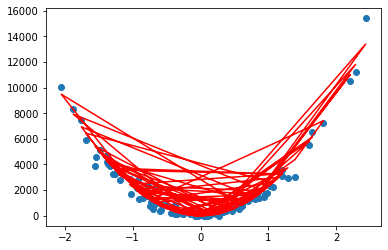

In [23]:
#vérification de l'apprentissage du madèle
predictions = model(X,theta_final)
plt.plot(x,predictions,c='r')
plt.scatter(x,y)

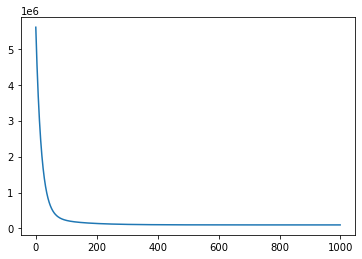

In [25]:
#cost_history ou visualiser la courbe d'apprentissage de notre algo (ici à partir de la 80ème itération on aurai pu aaréter les itérations) 
plt.plot(range(1000), cost_history)

In [26]:
#Coefficient de détermination (permet de montrer la performance de notre modèle- plus proche de 1 plus le modèle performant)
def coef_determination(y , pred):
    u = ((y-pred)**2).sum()
    v = ((y- y.mean())**2).sum()
    return 1- u/v

In [27]:
coef_determination(y, predictions)

0.9736842066008138